Project 2: Python Module for Alloy Sales Forecasting and Analysis

In [1]:
# This notebook performs EDA and business-driven insights
# from `alloy_analysis_view.csv`, exported from SQL
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('alloy_analysis_view.csv')

In [4]:
###  Basic Checks
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1000 non-null   object 
 1   Alloy              1000 non-null   object 
 2   Type               1000 non-null   object 
 3   Grade              1000 non-null   object 
 4   Supplier           1000 non-null   object 
 5   Sector             1000 non-null   object 
 6   Application        1000 non-null   object 
 7   BuyerID            1000 non-null   object 
 8   Quantity_kg        1000 non-null   float64
 9   UnitPrice_INR      1000 non-null   float64
 10  BaseCost_INR       1000 non-null   float64
 11  Margin_INR_per_kg  1000 non-null   float64
 12  TotalMargin        1000 non-null   float64
 13  Region             1000 non-null   object 
 14  Month              1000 non-null   object 
 15  WeekNum            1000 non-null   int64  
 16  IsHoliday          1000 n

,Quantity_kg,UnitPrice_INR,BaseCost_INR,Margin_INR_per_kg,TotalMargin,WeekNum,IsHoliday
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,995.046060,1254.347090,965.900770,288.446336,8.271279e+04,25.320000,0.240000
std,497.379648,525.017899,130.815405,541.059385,5.583255e+05,14.281091,0.427297
min,289.320000,350.290000,813.920000,-780.880005,-2.725342e+06,1.000000,0.000000
25%,672.922500,818.975000,813.920000,-152.127457,-1.926253e+05,14.000000,0.000000
50%,873.665000,1232.910000,958.970000,276.120056,2.310800e+05,24.000000,0.000000
75%,1140.932500,1683.880000,1135.750000,717.460022,4.443612e+05,37.000000,0.000000
max,3832.320000,2198.770000,1135.750000,1376.479919,1.177532e+06,53.000000,1.000000


In [19]:
# Date Cleanup and Feature Engineering
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df['Month'] = df['Date'].dt.to_period('M').dt.to_timestamp()
df['Year'] = df['Date'].dt.year

In [6]:
# Create Revenue Column
df['Revenue'] = df['Quantity_kg'] * df['UnitPrice_INR']

In [8]:
# Sector-wise Margin & Quantity Analysis
sector_summary = df.groupby('Sector').agg({
    'Quantity_kg': 'sum',
    'TotalMargin': 'sum',
    'UnitPrice_INR': 'mean',
    'Margin_INR_per_kg': 'mean'
}).sort_values('TotalMargin', ascending=False)

print("\n Sector-wise Summary:")
print(sector_summary)


 Sector-wise Summary:
            Quantity_kg   TotalMargin  UnitPrice_INR  Margin_INR_per_kg
Sector                                                                 
Aerospace     287818.33  6.038118e+07    1246.895993         282.172137
Automotive    331819.50  3.353239e+07    1273.271882         313.275250
Biomedical    375408.23 -1.120078e+07    1242.717741         270.324039


 Highest total margin comes from: Aerospace


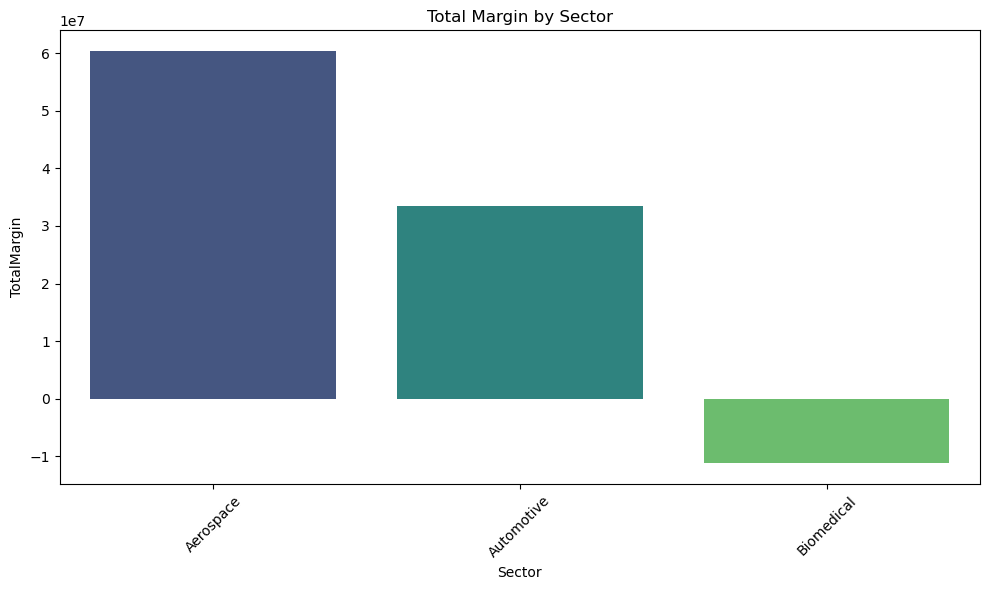

In [9]:
# Insight
top_sector = sector_summary['TotalMargin'].idxmax()
print(f" Highest total margin comes from: {top_sector}")

 # Plot Sector vs Total Margin
plt.figure(figsize=(10,6))
sns.barplot(data=sector_summary.reset_index(), x='Sector', y='TotalMargin', palette='viridis')
plt.title('Total Margin by Sector')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Lowest revenue month in dataset: 2021-12-01 00:00:00


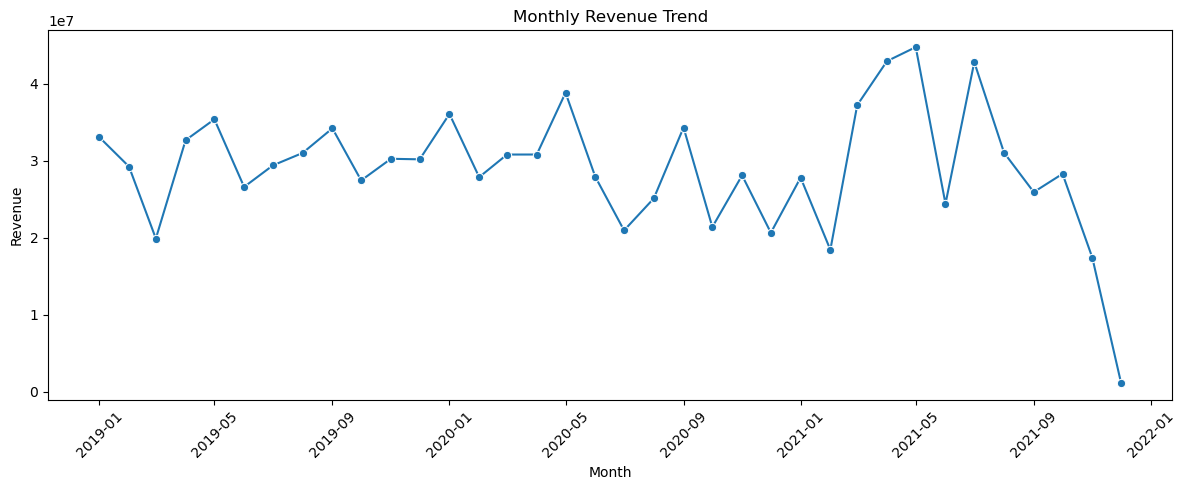

In [20]:
# Monthly Revenue Trend
monthly = df.groupby('Month').agg({
    'Revenue': 'sum',
    'TotalMargin': 'sum',
    'Quantity_kg': 'sum'
}).reset_index()

#  Insight
worst_month = monthly.sort_values('Revenue').iloc[0]['Month']
print(f" Lowest revenue month in dataset: {worst_month}")

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly, x='Month', y='Revenue', marker='o')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Region-wise Revenue Summary:
                  Revenue   TotalMargin  Quantity_kg
Region                                              
US West      3.628754e+08  2.902932e+07    347922.04
India North  3.491410e+08  2.335865e+07    338389.71
EU           3.318104e+08  3.032482e+07    308734.31


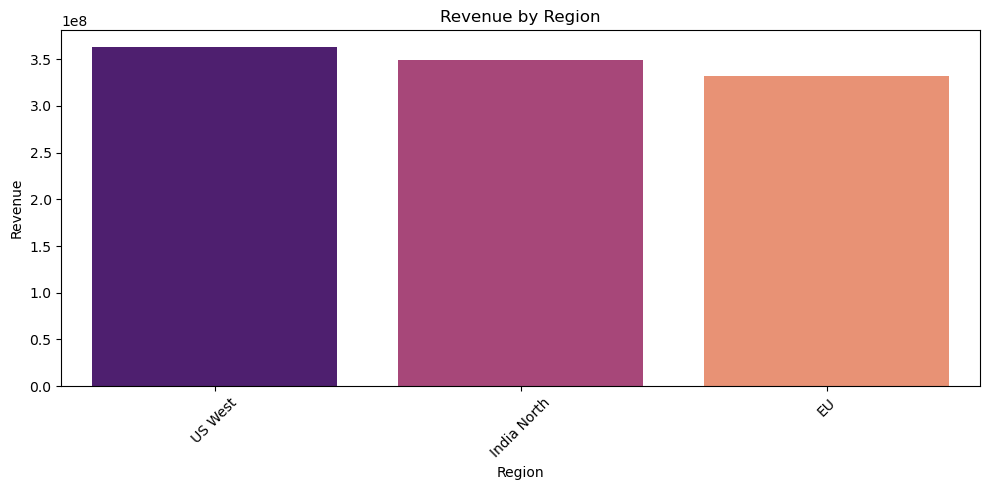

In [13]:
# Region-Wise Revenue Summary
region_summary = df.groupby('Region').agg({
    'Revenue': 'sum',
    'TotalMargin': 'sum',
    'Quantity_kg': 'sum'
}).sort_values('Revenue', ascending=False)

print("\n Region-wise Revenue Summary:")
print(region_summary)

plt.figure(figsize=(10,5))
sns.barplot(data=region_summary.reset_index(), x='Region', y='Revenue', palette='magma')
plt.title('Revenue by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Revenue & Margin by Industry Cycle:
                    Revenue    TotalMargin
IndustryCycle                             
Peak\r         1.060715e+06  112089.379368
Lean\r         1.047447e+06   93607.253939
Stable\r       1.019029e+06   34185.071077


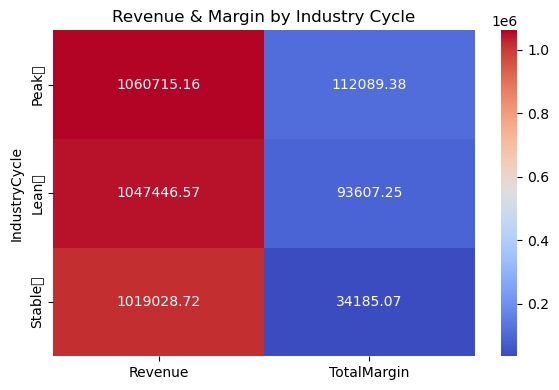

In [14]:
#Industry Cycle Impact
cycle_impact = df.groupby('IndustryCycle').agg({
    'Revenue': 'mean',
    'TotalMargin': 'mean'
}).sort_values('Revenue', ascending=False)

print("\n Revenue & Margin by Industry Cycle:")
print(cycle_impact)

plt.figure(figsize=(6,4))
sns.heatmap(cycle_impact, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Revenue & Margin by Industry Cycle')
plt.tight_layout()
plt.show()

In [15]:
# Price Elasticity Check (Correlation)
print("\n Price–Quantity Correlation by Sector:")
for sector in df['Sector'].unique():
    sub = df[df['Sector'] == sector]
    corr = sub['UnitPrice_INR'].corr(sub['Quantity_kg'])
    print(f"Sector: {sector:<15} → Correlation: {corr:.2f}")


 Price–Quantity Correlation by Sector:
Sector: Automotive      → Correlation: -0.89
Sector: Aerospace       → Correlation: -0.78
Sector: Biomedical      → Correlation: -0.86


In [16]:
# Profit Efficiency (Margin/Revenue Ratio)
sector_summary['Margin_Per_Revenue'] = sector_summary['TotalMargin'] / (sector_summary['Quantity_kg'] * sector_summary['UnitPrice_INR'])
sector_summary['Margin_Per_Revenue'] = sector_summary['Margin_Per_Revenue'].round(2)

In [17]:
print("\n Profit Efficiency by Sector:")
print(sector_summary[['Margin_Per_Revenue']])


 Profit Efficiency by Sector:
            Margin_Per_Revenue
Sector                        
Aerospace                 0.17
Automotive                0.08
Biomedical               -0.02


In [21]:
# Export to CSV
monthly.to_csv('monthly_summary.csv', index=False)
sector_summary.to_csv('sector_summary.csv')
region_summary.to_csv('region_summary.csv')

print("\n Exported all summaries successfully.")


 Exported all summaries successfully.


In [22]:
#Month-over-Month Revenue Growth
monthly['Revenue_Growth_%'] = monthly['Revenue'].pct_change() * 100
monthly['Revenue_Growth_%'] = monthly['Revenue_Growth_%'].round(2)
print("\n Month-over-Month Revenue Growth:")
print(monthly[['Month', 'Revenue', 'Revenue_Growth_%']].tail())


 Month-over-Month Revenue Growth:
        Month       Revenue  Revenue_Growth_%
31 2021-08-01  3.103731e+07            -27.48
32 2021-09-01  2.590914e+07            -16.52
33 2021-10-01  2.828336e+07              9.16
34 2021-11-01  1.740759e+07            -38.45
35 2021-12-01  1.115456e+06            -93.59


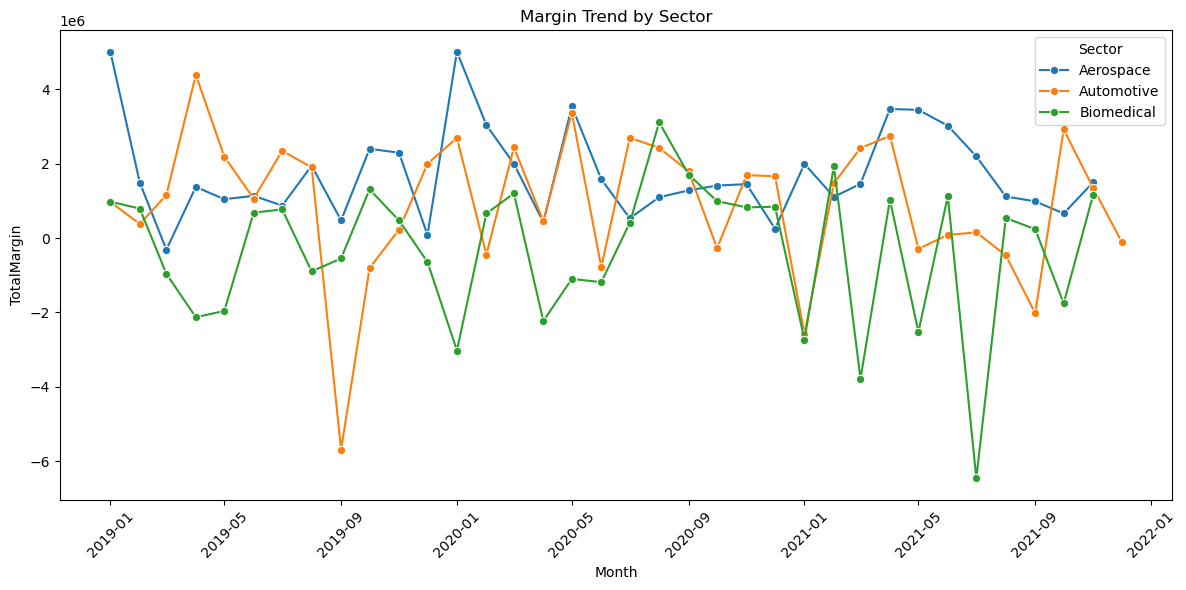

In [23]:
# Margin Trend by Sector
margin_trend = df.groupby(['Month', 'Sector'])['TotalMargin'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=margin_trend, x='Month', y='TotalMargin', hue='Sector', marker='o')
plt.title('Margin Trend by Sector')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Outlier Detection in Margin
Q1 = df['Margin_INR_per_kg'].quantile(0.25)
Q3 = df['Margin_INR_per_kg'].quantile(0.75)
IQR = Q3 - Q1
df['OutlierMarginFlag'] = ((df['Margin_INR_per_kg'] < (Q1 - 1.5 * IQR)) | (df['Margin_INR_per_kg'] > (Q3 + 1.5 * IQR)))
print("\n Outlier Margin Flag Counts:")
print(df['OutlierMarginFlag'].value_counts())


 Outlier Margin Flag Counts:
OutlierMarginFlag
False    1000
Name: count, dtype: int64


In [26]:
# Supplier Performance Analysis
supplier_summary = df.groupby('Supplier').agg({
    'Revenue': 'sum',
    'TotalMargin': 'sum',
    'Quantity_kg': 'sum',
    'BaseCost_INR': 'mean'
})
supplier_summary['Margin_Per_Kg'] = supplier_summary['TotalMargin'] / supplier_summary['Quantity_kg']
print("\n Supplier-wise Performance Summary:")
print(supplier_summary.round(2))


 Supplier-wise Performance Summary:
                       Revenue  TotalMargin  Quantity_kg  BaseCost_INR  \
Supplier                                                                 
AlloySphere Inc.  3.587644e+08  29179460.53    343686.43        958.97   
FusionMetals      3.280778e+08 -29676008.85    314993.46       1135.75   
MetalCore Ltd.    3.569845e+08  83209341.35    336366.17        813.92   

                  Margin_Per_Kg  
Supplier                         
AlloySphere Inc.          84.90  
FusionMetals             -94.21  
MetalCore Ltd.           247.38  


In [27]:
# Supplier Share by Alloy Type
supplier_alloy = df.groupby(['Supplier', 'Alloy'])['Quantity_kg'].sum().unstack().fillna(0)
print("\n Supplier Share by Alloy:")
print(supplier_alloy.head())


 Supplier Share by Alloy:
Alloy              Aluminum   Titanium  Zirconium
Supplier                                         
AlloySphere Inc.  343686.43       0.00       0.00
FusionMetals           0.00  314993.46       0.00
MetalCore Ltd.         0.00       0.00  336366.17


In [28]:
# Export to CSV
monthly.to_csv('monthly_summary.csv', index=False)
sector_summary.to_csv('sector_summary.csv')
region_summary.to_csv('region_summary.csv')
supplier_summary.to_csv('supplier_summary.csv')

print("\n Exported all summaries successfully.")


 Exported all summaries successfully.
